**PipeLine**  \
load -> model initialisation -> Cross validation -> cross-val-predict -> Confusion Matrix

## Step 0: Setup

In [1]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.pyplot as plt
import seaborn as sns

## Step 1: Load dataset

In [2]:
iris = load_iris()

In [3]:
for key in iris:
    print(key)

data
target
frame
target_names
DESCR
feature_names
filename
data_module


In [4]:
X = iris.data
y = iris.target

In [6]:
# data as dataset
import pandas as pd
df = pd.DataFrame(X, columns = iris.feature_names)
df['target'] = y
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Step 2: Initialise classification model

In [8]:
model = LogisticRegression(max_iter = 1000)

## Step 3: Cross Validation and getting the predictions

In [13]:
# define 5-fold cross validation
kf = KFold( n_splits = 5, shuffle=True, random_state = 11)

In [28]:
# cross_val_predict 
"""
what it does = it will run the 5 fold CV, and thus store 1 chunk of predictions from each iteration of the fold
and lastly it will stitch all those set of predictions (total = 5) and would thus make 150 total predictions (30 predictions from each fold of test)

Thus it is called out-of-fold-predictions (or predictions made Out of the 5 folds )
"""

y_pred = cross_val_predict(
    estimator = model,        # classification model
    X = X,
    y = y,
    cv = kf                  # K fold Cross Validation technique
)

In [17]:
# see 150 total predictions (30 from each fold of the 5 fold CV
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


## Step 4: Confusion matrix

In [18]:
conf_mat = confusion_matrix(y, y_pred)

In [20]:
print("Confusion Matrix: \n", conf_mat)

Confusion Matrix: 
 [[50  0  0]
 [ 0 47  3]
 [ 0  3 47]]


**Confusion Matrix**

* columns = Predicted
* rows = Actual

<table>
    <th>
        <td><b>0</b></td>
        <td><b>1</b></td>
        <td><b>2</b></td>
    </th>
    <tr>
        <td><b>0</b></td>
        <td>50</td>
        <td>0</td>
        <td>0</td>
    </tr>
    <tr>
        <td><b>1</b></td>
        <td>0</td>
        <td>47</td>
        <td>3</td>
    </tr>
    <tr>
        <td><b>2</b></td>
        <td>0</td>
        <td>3</td>
        <td>47</td>
    </tr>
</table>

## Step 5: Confusion matrix heatmap

In [23]:
class_names = iris.target_names

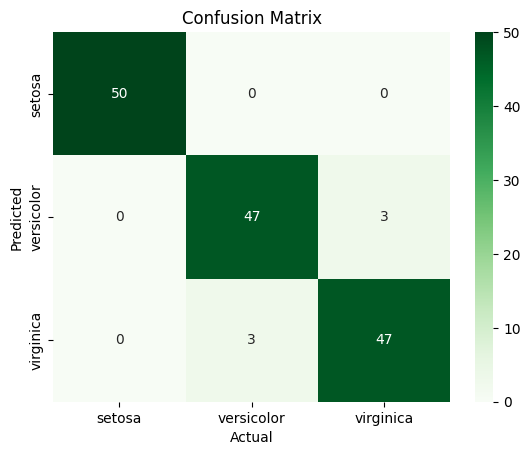

In [24]:
sns.heatmap(
    data = conf_mat,     # 2D data to plot, confusion matrix
    cmap = "Greens",      # color mapping
    annot = True,        # annotations, number in the boxes
    fmt = 'd',           # formatting string of annot - 'integer'
    xticklabels = class_names,
    yticklabels = class_names
)

plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Confusion Matrix")
plt.show()

## Step 6: Classification Report

In [27]:
print("Classification Report\n")
print(classification_report(y, y_pred, target_names = class_names) )

Classification Report

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.94      0.94      0.94        50
   virginica       0.94      0.94      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150

